In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,NaN,0.042485,1.97890,1.83630,2.88660,2.46960,NaN,3.09000,0.78343,NaN,0.03043,0.100660
1,0.029389,0.206580,NaN,1.43430,3.12990,1.27780,1.4285,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,NaN,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,NaN,0.36486,NaN,0.19027,0.56716,1.6601,2.35270,0.66126,NaN,3.93810,3.734600
4,-0.268400,-1.006000,NaN,1.56160,3.20140,NaN,1.5226,0.98475,3.10940,3.65640,3.91720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,NaN,0.88269,0.35406,1.6278,3.29400,NaN,0.15740,NaN,2.851400
396,0.264630,-6.107600,3.90540,NaN,1.41870,1.68610,1.0951,NaN,NaN,0.54249,3.36580,NaN
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.9254,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.9516,0.27800,0.99059,NaN,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	65
float64		column 2	79
float64		column 3	78
float64		column 4	118
float64		column 5	66
float64		column 6	78
float64		column 7	65
float64		column 8	65
float64		column 9	78
float64		column 10	40
float64		column 11	105
float64		column 12	105


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,335.000000,321.000000,322.000000,282.000000,334.000000,322.000000,335.000000,335.000000,322.000000,360.000000,295.000000,295.000000
mean,-0.214490,0.152529,2.087392,1.953128,1.940005,1.962241,2.038945,1.988451,1.965929,2.029295,1.976581,1.962132
std,2.347013,2.655892,1.100839,1.045605,1.110653,1.077246,1.098655,1.085202,1.109296,1.125992,1.065820,1.111386
min,-7.771000,-6.828400,0.010405,0.011551,0.000530,0.018503,0.016500,0.007321,0.007365,0.055837,0.030430,0.001972
25%,-0.650560,-0.650300,1.201925,1.181425,0.978445,1.155225,1.115850,1.136250,1.125600,1.067500,1.076750,1.027750
50%,-0.104000,0.058074,2.100500,1.880850,1.921050,1.952600,2.095800,1.988600,2.030950,2.073750,1.949700,2.022300
75%,0.629100,0.887210,2.986700,2.770175,2.876850,2.828800,2.909700,2.892350,2.819450,3.034550,2.879900,2.857000
max,7.293000,6.777100,3.976400,3.993400,3.966100,3.992300,3.978400,3.995000,3.985500,3.962700,3.967600,3.996000


<AxesSubplot:>

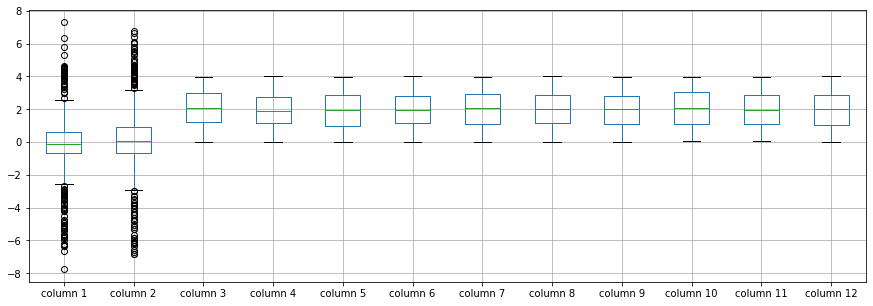

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.214490
column 2     0.152529
column 3     2.087392
column 4     1.953128
column 5     1.940005
column 6     1.962241
column 7     2.038945
column 8     1.988451
column 9     1.965929
column 10    2.029295
column 11    1.976581
column 12    1.962132
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.002887,-0.006821,-0.022995,-0.026979,-0.022949,0.017682,0.044824,-0.041192,0.037222,0.081844,-0.001172
column 2,0.002887,1.000000,-0.032133,-0.059050,-0.108647,-0.042748,-0.009689,0.057828,-0.023179,-0.003245,-0.063415,0.080383
column 3,-0.006821,-0.032133,1.000000,0.081706,-0.067633,-0.065245,-0.098730,0.115761,0.107503,-0.025703,-0.022887,-0.022805
column 4,-0.022995,-0.059050,0.081706,1.000000,-0.019708,0.010165,0.043877,0.006457,0.012942,0.060112,0.013928,-0.008770
column 5,-0.026979,-0.108647,-0.067633,-0.019708,1.000000,0.102866,0.010965,-0.014590,0.009576,-0.033237,-0.071648,-0.030182
column 6,-0.022949,-0.042748,-0.065245,0.010165,0.102866,1.000000,0.046785,0.047995,-0.044249,0.006393,0.021446,-0.070670
column 7,0.017682,-0.009689,-0.098730,0.043877,0.010965,0.046785,1.000000,0.023636,0.045707,0.049654,-0.013134,-0.069253
column 8,0.044824,0.057828,0.115761,0.006457,-0.014590,0.047995,0.023636,1.000000,0.092492,-0.058299,-0.013544,-0.044310
column 9,-0.041192,-0.023179,0.107503,0.012942,0.009576,-0.044249,0.045707,0.092492,1.000000,0.009008,0.018784,-0.068727
column 10,0.037222,-0.003245,-0.025703,0.060112,-0.033237,0.006393,0.049654,-0.058299,0.009008,1.000000,-0.024163,0.069226


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [12]:
imputer = md.Midas(layer_structure = [12,12+100,12+100+100,12+100+100+100,12+100+100+100+100,12+100+100+100+100+100,12+100+100+100+100+100+100,12+100+100+100+100+100+100+100,12+100+100+100+100+100+100,12+100+100+100+100+100,12+100+100+100+100,12+100+100+100,12+100+100,12+100,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 22.038533935546877
Epoch: 1 , loss: 21.892059783935547
Epoch: 2 , loss: 20.62060256958008
Epoch: 3 , loss: 19.71118667602539
Epoch: 4 , loss: 19.458121795654296
Epoch: 5 , loss: 18.98894790649414
Epoch: 6 , loss: 18.878944320678713
Epoch: 7 , loss: 18.882156143188478
Epoch: 8 , loss: 18.474496421813964
Epoch: 9 , loss: 18.56031005859375
Epoch: 10 , loss: 18.35575874328613
Epoch: 11 , loss: 18.252982940673828
Epoch: 12 , loss: 18.151801376342775
Epoch: 13 , loss: 17.867003593444824
Epoch: 14 , loss: 17.63094306945801
Epoch: 15 , loss: 17.68325607299805
Epoch: 16 , loss: 17.6440869140625
Epoch: 17 , loss: 17.378590507507326
Epoch: 18 , loss: 17.20649486541748
Epoch: 19 , loss: 17.27838779449463
Epoch: 20 , loss: 16.614196395874025
Epoch: 21 , loss: 16.78532455444336
Epoch: 22 , loss: 16.48207748413086
Epoch: 23 , loss: 16.504911422729492
Epoch: 24 , loss: 16.503219337463378
Epoch: 25 , loss: 16.516085815

In [13]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [14]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    1.69079
Name: 21, dtype: float64

In [15]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [16]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.273865,0.000000,0.000000,0.000000,0.0,0.000000,1.206617,0.000000,0.000000,0.794235,0.000000,0.000000
1,0.000000,0.000000,1.784186,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-3.497888,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.053175,0.000000,0.979194,0.0,0.000000,0.000000,0.000000,0.000000,-1.899316,0.000000,0.000000
4,0.000000,0.000000,-1.928076,0.000000,0.0,-2.501565,0.000000,0.000000,0.000000,0.000000,0.000000,-0.150759
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.000000,-1.992460,0.0,0.000000,0.000000,0.000000,0.673801,0.000000,1.295932,0.000000
396,0.000000,0.000000,0.000000,-0.155756,0.0,0.000000,0.000000,-2.583764,1.074070,0.000000,0.000000,-2.538862
397,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
398,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-1.841009,0.000000,0.000000


Calculating NRMSE Value

In [17]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [18]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [19]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(61.843448541189474, 163.27447192538312)

In [20]:
NRMS=numerator/denominator
NRMS


0.37876985796929785

In [21]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.159985,0.042485,1.978900,1.836300,2.88660,2.469600,1.422027,3.090000,0.783430,1.304585,0.030430,0.100660
1,0.029389,0.206580,2.272796,1.434300,3.12990,1.277800,1.428500,0.143330,1.194800,2.131800,0.984730,3.844500
2,-1.115400,0.217560,1.610500,1.337100,3.76820,1.210000,0.498412,2.217300,3.902900,1.514400,2.438900,0.633580
3,-0.539160,-0.008699,0.364860,1.311974,0.19027,0.567160,1.660100,2.352700,0.661260,1.235784,3.938100,3.734600
4,-0.268400,-1.006000,0.954124,1.561600,3.20140,0.875835,1.522600,0.984750,3.109400,3.656400,3.917200,0.796301
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,1.712340,0.88269,0.354060,1.627800,3.294000,1.758801,0.157400,1.760972,2.851400
396,0.264630,-6.107600,3.905400,1.181944,1.41870,1.686100,1.095100,1.209836,1.201970,0.542490,3.365800,1.216738
397,-3.479100,-1.993300,1.324800,1.772100,2.55090,1.470100,0.925400,1.841100,3.477300,0.954960,1.526300,2.123800
398,7.293000,-0.411470,2.494800,0.396550,2.99900,3.410100,2.951600,0.278000,0.990590,1.596391,1.816200,0.087212


In [23]:
imputations[-1].to_excel("Difdoug_NW_20(imp).xlsx", index=False, header=False)